In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv(r"C:\Users\Anilchoudary R\Gitrepos\bank-API-1\data\raw_data\creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Standardizing 'Amount' column
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

# Dropping 'Time' column as it's not useful
df.drop(columns=['Time'], inplace=True)

In [3]:
from imblearn.over_sampling import SMOTE

# Splitting data into features and labels
X = df.drop(columns=["Class"])
y = df["Class"]

# Balancing using SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

c:\Users\Anilchoudary R\Gitrepos\bank-API-1\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Save processed data

In [4]:
processed_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=["Class"])], axis=1)
processed_df.to_csv(r"C:\Users\Anilchoudary R\Gitrepos\bank-API-1\data\processed_data\creditcard.csv", index=False)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [10]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (341177, 29)
Testing data shape: (85295, 29)


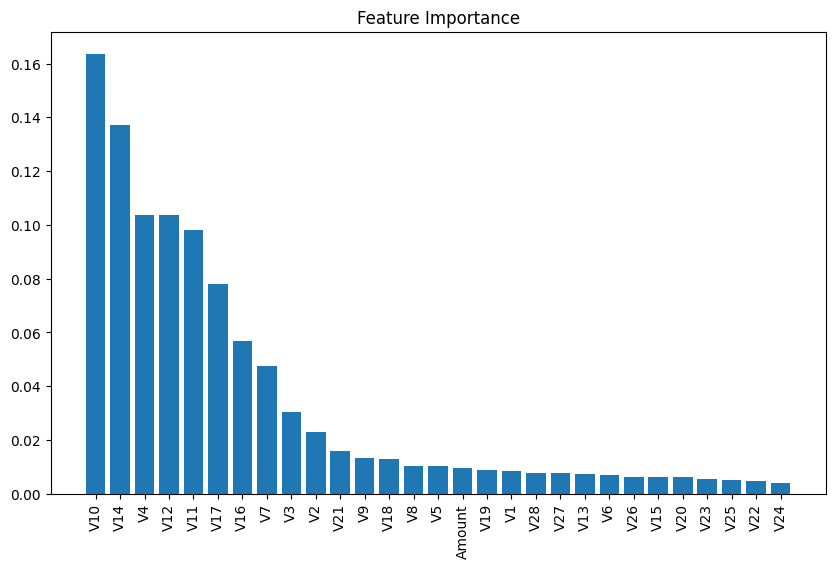

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("Feature Importance")
plt.show()

In [12]:
print(df.corr()["Class"].sort_values(ascending=False))


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


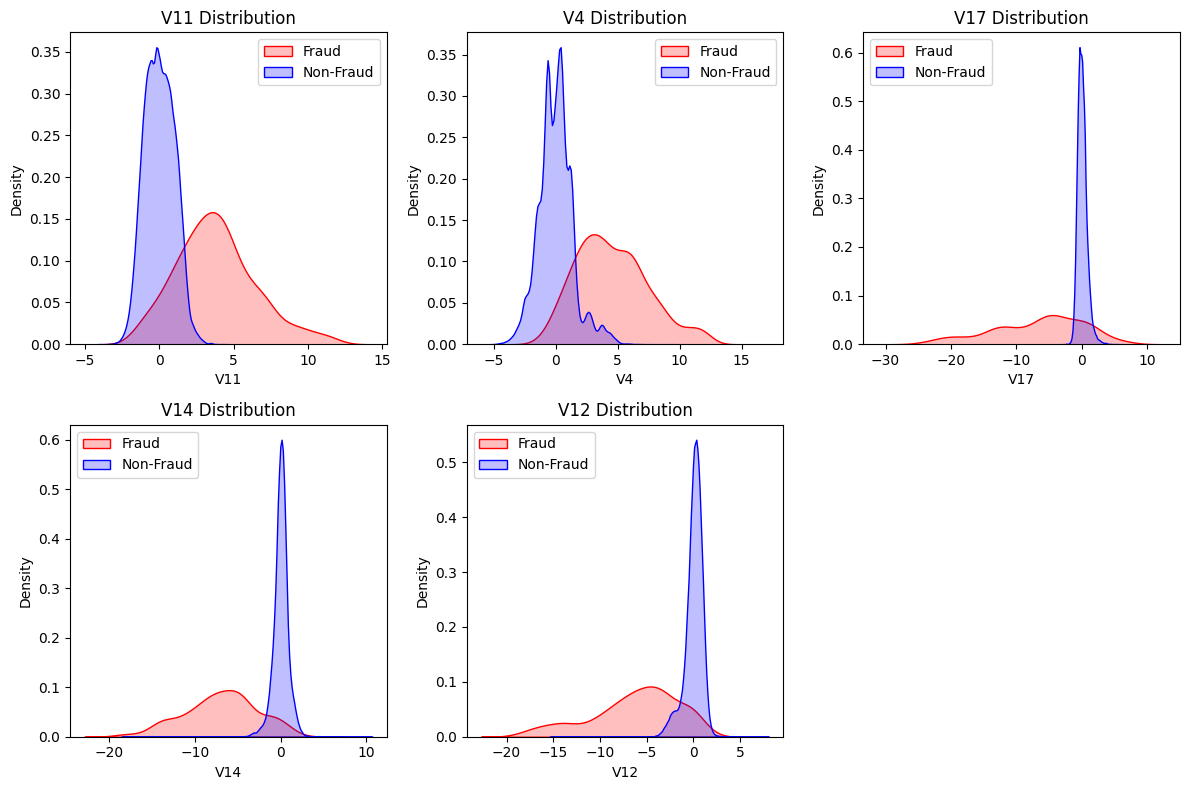

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud = df[df["Class"] == 1]
non_fraud = df[df["Class"] == 0]

features_to_check = ["V11", "V4", "V17", "V14", "V12"]

plt.figure(figsize=(12,8))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(fraud[feature], label="Fraud", fill=True, color="red")
    sns.kdeplot(non_fraud[feature], label="Non-Fraud", fill=True, color="blue")
    plt.title(f"{feature} Distribution")
    plt.legend()
plt.tight_layout()
plt.show()

In [14]:
selected_features = ["V11", "V4", "V2", "V21", "V19", "V20", "V8", "V27", "V28", "V26", "V25", "V7", "V3", "V16", "V10", "V12", "V14", "V17"]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295

